# Choosing the parameter <tt>standard_range</tt>

The purpose of this example is to demonstrate the effect of the <tt>standard_range</tt> parameter.

For efficiency reasons, the algorithms implemented in this library work with Rips complexes; however, when this parameter is set to <tt>True</tt>, the output of the algorithms are guaranteed to represent non-trivial, continuous maps on the Čech complex of the data.
In order to be able to guarantee this, the persistent cohomology class has to be sufficiently long, in the following sense: if the persistent cohomology class is represented by a point $(a,b)$ in the persistence diagram, we must have $2a < b$.
If $2a \geq b$ and <tt>standard_range</tt> is set to <tt>True</tt>, the algorithm will return an error, and suggest setting <tt>standard_range</tt> to <tt>False</tt>.

The user can then decide to set <tt>standard_range</tt> to <tt>False</tt>, or to increase the parameter <tt>n_landmarks</tt>, which often results in a persistence diagram with classes that are born earlier (i.e., classes $(a,b)$ for which $a$ is smaller).

In [1]:
import matplotlib.pyplot as plt
from dreimac import CircularCoords, GeometryExamples, CircleMapUtils
from persim import plot_diagrams

We consider two datasets, both consisting of a noisy circle with different levels of noise.
We start with a not very noisy circle.

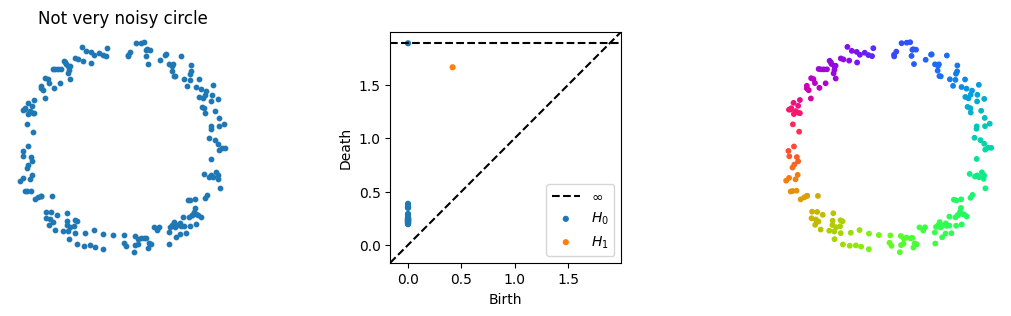

In [2]:
f, (a0, a1, a2) = plt.subplots(1, 3, width_ratios=[1, 1, 1], figsize=(14,3))

X1 = GeometryExamples.noisy_circle(n_samples = 200, noise_size=0.2)

a0.scatter(X1[:,0],X1[:,1], s = 10)
a0.set_title("Not very noisy circle") ; a0.axis("off") ; a0.set_aspect("equal")

cc = CircularCoords(X1, 30, prime=3)
plot_diagrams(cc.dgms_, ax=a1)

circular_coordinates = cc.get_coordinates(standard_range=True)
a2.scatter(X1[:,0], X1[:,1], c=CircleMapUtils.to_sinebow(circular_coordinates), s=10)
a2.axis("off") ; a2.set_aspect("equal")


Now for a quite noisy circle.

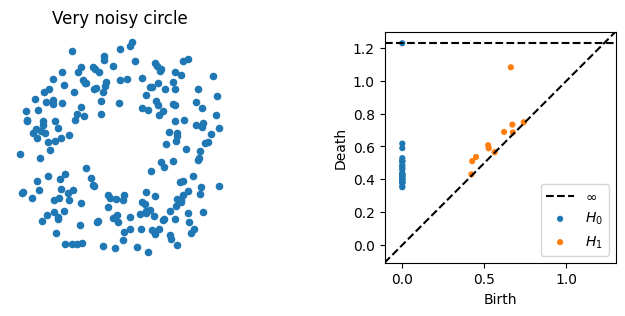

In [3]:
f, (a0, a1) = plt.subplots(1, 2, width_ratios=[1, 1], figsize=(9,3))

X2 = GeometryExamples.noisy_circle(n_samples = 200, noise_size=0.8)

a0.scatter(X2[:,0],X2[:,1], s = 20)
a0.set_title("Very noisy circle") ; a0.axis("off") ; a0.set_aspect("equal")

cc2 = CircularCoords(X2, 30, prime=3)
plot_diagrams(cc2.dgms_, ax=a1)


Using the most persistent class to construct a circular coordinate with <tt>standard_range</tt> equals to <tt>True</tt> results in an error, as described above:

In [4]:
circular_coordinates = cc2.get_coordinates(standard_range=True)

Exception: The cohomology class selected is too short, try setting standard_range to False.

However, using <tt>standard_range</tt> equals to <tt>False</tt> gives a good result, even if the theory does not guarantee this:

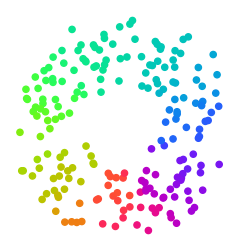

In [5]:
circular_coordinates2 = cc2.get_coordinates(standard_range=False)

plt.figure(figsize=(3,3))
plt.scatter(X2[:,0], X2[:,1], c=CircleMapUtils.to_sinebow(circular_coordinates2), s=20)
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

As explained above, sometimes another option is to increase the parameter <tt>n_landmarks</tt> so that persistent cohomology classes are born earlier:

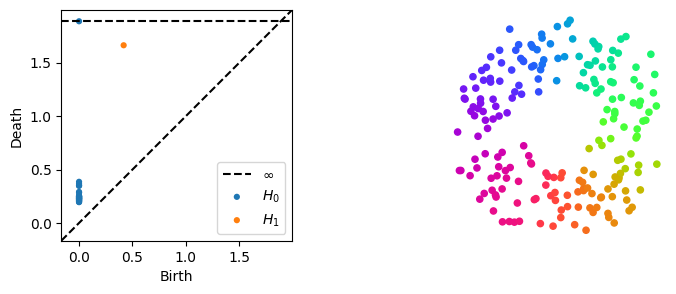

In [6]:
f, (a0, a1) = plt.subplots(1, 2, width_ratios=[1, 1], figsize=(9,3))

cc3 = CircularCoords(X2, 50, prime=3)
plot_diagrams(cc.dgms_, ax=a0)

circular_coordinates3 = cc3.get_coordinates(standard_range=True)
a1.scatter(X2[:,0], X2[:,1], c=CircleMapUtils.to_sinebow(circular_coordinates3), s=20)
a1.axis("off") ; a1.set_aspect("equal")